In [1]:
import datetime as dt
import matplotlib.dates as mdates
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.cm as cm
import matplotlib.colors as cl
from matplotlib import gridspec
import dill
from datetime import datetime
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import requests

In [15]:
starttimeta=UTCDateTime(input("start time TA?"))
endtimeta=UTCDateTime(input("endtime time TA?"))
starttimeak=UTCDateTime(input("start time AK?"))
endtimeak=UTCDateTime(input("endtime time AK?"))

TypeError: an integer is required (got type str)

In [38]:
stepta=(starttimeta-endtimeta)/76
stepak=(starttimeak-endtimeak)/26
timesta=np.arange(starttimeta,endtimeta,-stepta)
timesak=np.arange(starttimeak,endtimeak,-stepak)

In [39]:
starttimes=[]
endtimes=[]
net=[]
for i in range(75):
    k=str(timesta[i])
    starttimes.append((k[:10])+"T00:00:00")
starttimes.append((str(timesta[-1])[:10])+"T00:00:00")
for i in range(25):
    starttimes.append((str(timesak[i])[:10])+"T00:00:00")
for i in range(1,76):
    endtimes.append((str(timesta[i])[:10])+"T00:00:00")
endtimes.append((str(endtimeta)[:10])+"T00:00:00")
for i in range(1,26):
    endtimes.append((str(timesak[i])[:10])+"T00:00:00")
starttimes.append(endtimes[-1])
endtimes.append((str(endtimeak)[:10])+"T00:00:00")
for i in range(76):
    net.append("TA")
for i in range(26):
    net.append("AK")
#print(starttimes)
#print(endtimes)




In [40]:
sta=input("Station?")
loc=input("location?")
cha=input("channel?")

Station? O14K
location? *
channel? BHZ


In [41]:
dill.dump_session('notebook_env.db')

In [6]:
import requests
for z in range (len(starttimes)):
    url1='https://service.iris.edu/mustang/noise-psd/1/query?target='+net[z]+"."+sta+"."+loc+"."+cha+".M&starttime="+str(starttimes[z])+"&endtime="+str(endtimes[z])+"&format=xml"
    url2='https://service.iris.edu/irisws/timeseries/1/query?net='+net[z]+"&sta="+sta+"&cha=LDV&start="+str(starttimes[z])+"&end="+str(endtimes[z])+"&deci=0.0002777777777777&format=ascii2&loc=EP"
    try:
        print("urlpdf",url1)
        resp1= requests.get(url1)
        print("urlpressure",url2)
        resp2=requests.get(url2)
        with open('pdf'+str(z)+".xml", 'w') as foutput:
            foutput.write(resp1.content.decode('utf-8'))
        with open('pressure'+str(z)+".txt", 'w') as foutput:
            foutput.write(resp2.content.decode('utf-8'))
    except:
        print("check")
        break

urlpdf https://service.iris.edu/mustang/noise-psd/1/query?target=TA.O14K.*.BHZ.M&starttime=2017-05-17T00:00:00&endtime=2017-06-02T00:00:00&format=xml
urlpressure https://service.iris.edu/irisws/timeseries/1/query?net=TA&sta=O14K&cha=LDV&start=2017-05-17T00:00:00&end=2017-06-02T00:00:00&deci=0.0002777777777777&format=ascii2&loc=EP
urlpdf https://service.iris.edu/mustang/noise-psd/1/query?target=TA.O14K.*.BHZ.M&starttime=2017-06-02T00:00:00&endtime=2017-06-18T00:00:00&format=xml
urlpressure https://service.iris.edu/irisws/timeseries/1/query?net=TA&sta=O14K&cha=LDV&start=2017-06-02T00:00:00&end=2017-06-18T00:00:00&deci=0.0002777777777777&format=ascii2&loc=EP
urlpdf https://service.iris.edu/mustang/noise-psd/1/query?target=TA.O14K.*.BHZ.M&starttime=2017-06-18T00:00:00&endtime=2017-07-04T00:00:00&format=xml
urlpressure https://service.iris.edu/irisws/timeseries/1/query?net=TA&sta=O14K&cha=LDV&start=2017-06-18T00:00:00&end=2017-07-04T00:00:00&deci=0.0002777777777777&format=ascii2&loc=EP
urlp

In [7]:
# import requests
# for z in range (1):
#     z=48
#     url1='https://service.iris.edu/mustang/noise-psd/1/query?target='+net[z]+"."+sta+"."+loc+"."+cha+".M&starttime="+str(starttimes[z])+"&endtime="+str(endtimes[z])+"&format=xml"
#     url2='https://service.iris.edu/irisws/timeseries/1/query?net='+net[z]+"&sta="+sta+"&cha=LDV&start="+str(starttimes[z])+"&end="+str(endtimes[z])+"&format=ascii2&loc=EP"
#     try:
#         print("urlpdf",url1)
#         #resp1= requests.get(url1)
#         print("urlpressure",url2)
#         resp2=requests.get(url2)
#         #with open('pdf'+str(z)+".xml", 'w') as foutput:
#             #foutput.write(resp1.content.decode('utf-8'))
#         with open('pressure'+str(z)+".txt", 'w') as foutput:
#             foutput.write(resp2.content.decode('utf-8'))
#     except:
#         print("check")
#         break

In [65]:
files=[]
for name in glob.glob(os.path.join(os.getcwd(),"pressure*.txt")):
    files.append(name)

In [9]:
plines=[]
for names in files:
    with open(names,'r') as infile:
        for line in infile:
            plines.append(line)
len(plines)

49050

In [10]:
filespdf=[]
for name in glob.glob(os.path.join(os.getcwd(),"*.xml")):
    filespdf.append(name)

In [11]:
lines=[]
for names in filespdf:
    with open(names,'r') as infile:
        for line in infile:
            lines.append(line)
            

In [12]:
pattern=re.compile("<Psd target=\"([A-z]*)\.[\.A-z\d\"\s]+start=\"(\d\d\d\d-\d\d-\d\dT\d\d:\d\d:\d\d\.\d\d\dZ)\" end=\"(\d\d\d\d-\d\d-\d\dT\d\d:\d\d:\d\d\.\d\d\dZ)\"")
pattern1=re.compile("<value freq=\"([1]?[0-9]?\.[\d]+)\"[\s,a-z,=]*\"(\-?[\d]+\.?[\d]+)\"")

In [13]:
time_frames=np.arange(starttimeta,endtimeak,1800)
for i in range(len(time_frames)):
    time_frames[i]=mdates.date2num(time_frames[i])

In [14]:
count=0
avail_time=[]
for line in lines:
    result=re.finditer(pattern,line)
    for match in result:
        count+=1
        avail_time.append(mdates.date2num(UTCDateTime(match.group(2))))

In [15]:
both = set(avail_time).intersection(time_frames)
result=[]
for ele in both:
    result.append(np.where(time_frames==ele))


In [16]:
result[0]
#mdates.num2date(17953.041666666668)

(array([65029]),)

In [17]:
result.sort()
print(len(result))


72778


In [18]:
ma=np.zeros((96,len(time_frames)))
r=-1
co=0
nmatch=0
for line in lines:
    result1=re.finditer(pattern1,line)
    for match in result1:
        nmatch+=1
        try:
            if r==95:
                r=0
                co+=1
            else:
                r+=1 
            ma[r,result[co][0][0]]=(match.group(2))
        except:
            pass


In [19]:

ma[0,0]

0.0

In [20]:
ma=np.delete(ma, range(1, ma.shape[1], 2), axis=1)

In [21]:
print(np.shape(ma))
ma[95,35351]

(96, 37416)


-146.27381873948471

In [22]:
np.save('final.npy',ma)
pmin=(np.amin(ma))
pmax=np.amax(ma)
print(pmax)

9.77478260415


<s> </s>

<b>PRESSURE</b>

In [23]:
pattern=re.compile("(\d\d\d\d-\d\d-\d\dT\d\d:\d\d:\d\d.\d\d\d\d\d\d)  ([\d\.]+)")

In [24]:
r=-1
nmat=0
for line in plines:
    result2=re.finditer(pattern,line)
    for match in result2:
        nmat+=1
pma=np.zeros((nmat,2))
for line in plines:
    result2=re.finditer(pattern,line)
    for match in result2:
        r+=1
        #pma[r,1]=(match.group(1))
        pma[r,0]=mdates.date2num(UTCDateTime(match.group(1)))
        pma[r,1]=((float(match.group(2))/10132.5))


In [25]:
np.save('finalp.npy',pma)
pma

array([[  1.73053764e+04,   4.72865542e-01],
       [  1.73054181e+04,   9.98684037e-01],
       [  1.73054598e+04,   8.78712243e-01],
       ..., 
       [  1.88618835e+04,   9.19243079e-01],
       [  1.88619252e+04,   9.04013807e-01],
       [  1.88619668e+04,   9.46262028e-01]])

<b> Wind data </b>

In [61]:
for z in range (len(starttimes)):
    url2='https://service.iris.edu/irisws/timeseries/1/query?net='+net[z]+"&sta="+sta+"&cha=LWS&start="+str(starttimes[z])+"&end="+str(endtimes[z])+"&deci=0.0002777777777777&format=ascii2&loc=EP"
    try:
        print("urlwind",url2)
        resp3=requests.get(url2)
        with open('wind'+str(z)+".txt", 'w') as foutput:
            foutput.write(resp3.content.decode('utf-8'))
    except:
        print("check: "z)


urlwind https://service.iris.edu/irisws/timeseries/1/query?net=TA&sta=O14K&cha=LWS&start=2017-05-17T00:00:00&end=2017-06-02T00:00:00&deci=0.0002777777777777&format=ascii2&loc=EP
urlwind https://service.iris.edu/irisws/timeseries/1/query?net=TA&sta=O14K&cha=LWS&start=2017-06-02T00:00:00&end=2017-06-18T00:00:00&deci=0.0002777777777777&format=ascii2&loc=EP
urlwind https://service.iris.edu/irisws/timeseries/1/query?net=TA&sta=O14K&cha=LWS&start=2017-06-18T00:00:00&end=2017-07-04T00:00:00&deci=0.0002777777777777&format=ascii2&loc=EP
urlwind https://service.iris.edu/irisws/timeseries/1/query?net=TA&sta=O14K&cha=LWS&start=2017-07-04T00:00:00&end=2017-07-20T00:00:00&deci=0.0002777777777777&format=ascii2&loc=EP
urlwind https://service.iris.edu/irisws/timeseries/1/query?net=TA&sta=O14K&cha=LWS&start=2017-07-20T00:00:00&end=2017-08-05T00:00:00&deci=0.0002777777777777&format=ascii2&loc=EP
urlwind https://service.iris.edu/irisws/timeseries/1/query?net=TA&sta=O14K&cha=LWS&start=2017-08-05T00:00:00&e

In [67]:
files=[]
for name in glob.glob(os.path.join(os.getcwd(),"wind*.txt")):
    files.append(name)

In [70]:
wlines=[]
for names in files:
    with open(names,'r') as infile:
        for line in infile:
            wlines.append(line)
len(wlines)

49049

In [71]:
pattern=re.compile("(\d\d\d\d-\d\d-\d\dT\d\d:\d\d:\d\d.\d\d\d\d\d\d)  ([\d\.]+)")

In [74]:
r=-1
nmat=0
for line in wlines:
    result2=re.finditer(pattern,line)
    for match in result2:
        nmat+=1
wma=np.zeros((nmat,2))
for line in wlines:
    result2=re.finditer(pattern,line)
    for match in result2:
        r+=1
        #pma[r,1]=(match.group(1))
        wma[r,0]=mdates.date2num(UTCDateTime(match.group(1)))
        wma[r,1]=((float(match.group(2))/10))


In [75]:
np.save('finalw.npy',wma)
wma

array([[  1.73053764e+04,   1.18871040e+00],
       [  1.73054181e+04,   1.36173790e+00],
       [  1.73054598e+04,   1.12017780e+00],
       ..., 
       [  1.88618835e+04,   4.41633340e+00],
       [  1.88619252e+04,   4.22973100e+00],
       [  1.88619668e+04,   4.68077620e+00]])

<s></s>
<b>plotting</b>





In [3]:
os.chdir(r"/home/sjohn/AON_PROJECT/O14K")
dill.load_session("notebook_env.db")

/home/sjohn/.conda/envs/roses_2021/lib/python3.9/site-packages/dill/_dill.py:525: UserWarning: This figure was saved with matplotlib version 3.4.2 and is unlikely to function correctly.
  obj = StockUnpickler.load(self)


In [4]:
with open('final.npy', 'rb') as g:
    final=np.load(g)
num_rows, num_cols =final.shape

In [5]:
final[0,35351]

-176.09989335816718

In [6]:
startt=UTCDateTime(starttimes[0])
endt=UTCDateTime(endtimes[-1])
l=((endt-startt)/num_cols)
print(l)
time=np.arange(startt,endt,l)
np.shape(time)
pmin=(np.amin(final))
pmax=np.amax(final)

3600.0


In [7]:
time_mpl = [t.matplotlib_date for t in time]
print(time_mpl[100])


17307.1666667


In [8]:
date_format=mdates.DateFormatter('%d,%b,%y')
date_format1=mdates.DateFormatter('%d,%b,%y')
date_format

In [9]:
freq=[]
name= pd.read_xml("pdf0.xml", xpath="/PsdRoot/Psds[1]/Psd[1]/value[@freq]")
for i in range (95):
    freq.append(name.iloc[i]['freq'])
freq.append(19.740300000000000)
len(freq)

96

In [10]:
with open('finalp.npy', 'rb') as g:
    finalp=np.load(g)

In [11]:
with open('finalw.npy', 'rb') as g:
    finalw=np.load(g)

In [12]:
fint_frames=np.arange(starttimeta,endtimeak,3600)
for i in range(len(fint_frames)):
    fint_frames[i]=mdates.date2num(fint_frames[i])
mintp=min(fint_frames)
maxtp=max(fint_frames)

In [13]:
len(fint_frames)

37416

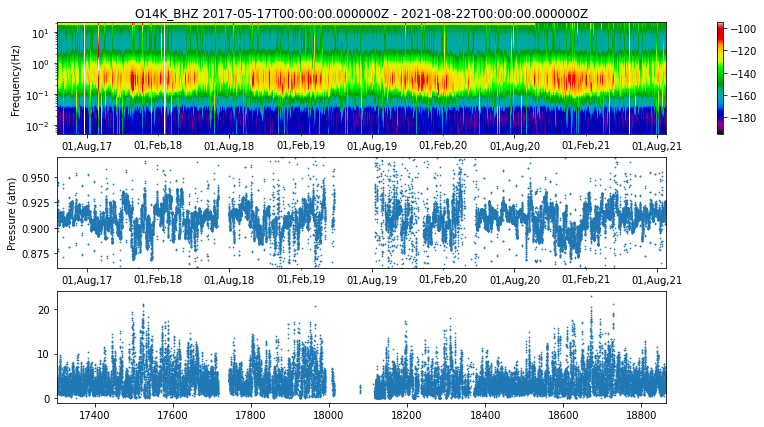

In [14]:
cmap = plt.get_cmap('nipy_spectral').copy()
cmap.set_over(color = 'w')
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(12)
spec = gridspec.GridSpec(ncols=2, nrows=3,width_ratios=[10, 1], wspace=0,hspace=0.2, height_ratios=[1,1,1])
ax1 = fig.add_subplot(spec[0])
c = ax1.pcolormesh(fint_frames,freq,final,cmap=cmap,vmin=-195,vmax=-95,shading='auto')
#fig.set_figwidth(10)
#fig.set_figheight(3)
nom=cl.Normalize(vmin=-195,vmax=-95)
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[8]))
ax1.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[2]))
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_minor_formatter(date_format1)
#ax1.set_xticklabels(time_mpn)
ax1.set_ylabel("Frequency(Hz)")
#plt.ylim([0.11, 1])
#ax1.set_yticklabels([0.1,1,10,100])
ax1.set_yscale('log')
ax1.title.set_text(sta+"_"+cha+" "+str(UTCDateTime((mdates.num2date(min(fint_frames))).strftime('%Y-%m-%d')))+" - "+str(UTCDateTime((mdates.num2date(max(fint_frames))).strftime('%Y-%m-%d'))))
ax0 = fig.add_subplot(spec[1])
ax0.axis('off')
fig.colorbar(cm.ScalarMappable(norm=nom, cmap="nipy_spectral"), ax=ax0)
ax2 = fig.add_subplot(spec[2])
ax2.scatter(finalp[:,0],finalp[:,1], s=0.5)
ax2.set_ylim([0.86,0.97])
ax2.set_xlim([mintp,maxtp])
ax2.set_ylabel("Pressure (atm)")
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[8]))
ax2.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[2]))
ax2.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_minor_formatter(date_format1)
fig.set_facecolor('white')
ax3=fig.add_subplot(spec[4])
ax3.scatter(finalw[:,0],finalw[:,1], s=0.5)
ax3.set_xlim([mintp,maxtp])

fig.savefig("finalspectrotrial"+sta+".png")


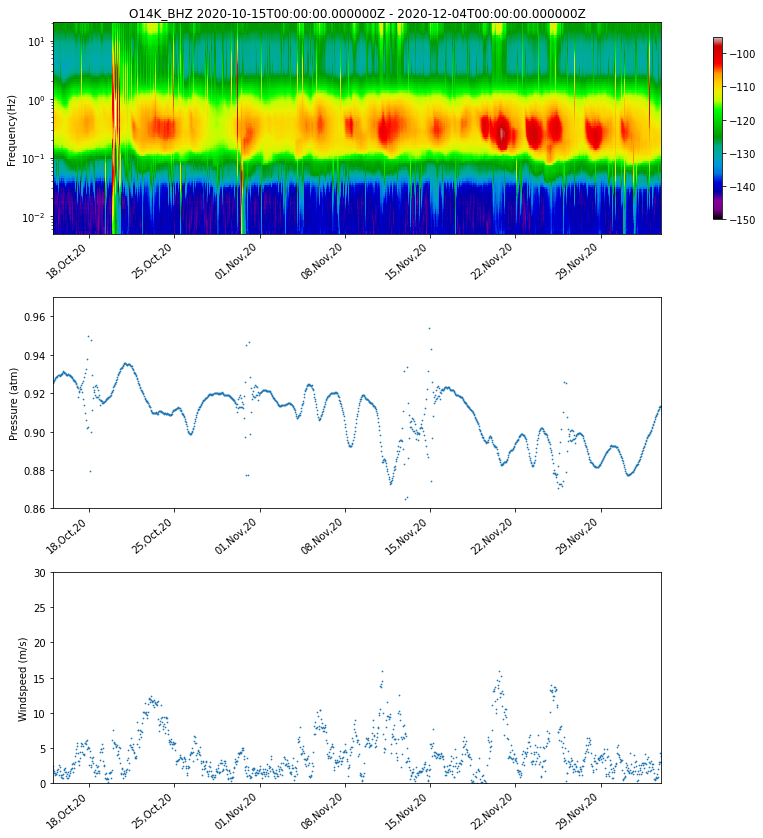

In [14]:
xmin=18550
xmax=18600


cmap = plt.get_cmap('nipy_spectral').copy()
cmap.set_over(color = 'w')
fig = plt.figure()
fig.set_figheight(14)
fig.set_figwidth(12)
spec = gridspec.GridSpec(ncols=2, nrows=3,width_ratios=[10, 1], wspace=0,hspace=0.3, height_ratios=[1,1,1])
ax1 = fig.add_subplot(spec[0])
c = ax1.pcolormesh(fint_frames,freq,final,cmap=cmap,vmin=-195,vmax=-95,shading='auto',rasterized=True)

nom=cl.Normalize(vmin=-150,vmax=-95)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU)))
#ax1.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=(WE)))
ax1.xaxis.set_major_formatter(date_format)
#ax1.xaxis.set_minor_formatter(date_format1)

ax1.set_ylabel("Frequency(Hz)")

ax1.set_yscale('log')
ax1.title.set_text(sta+"_"+cha+" "+str(UTCDateTime((mdates.num2date(xmin)).strftime('%Y-%m-%d')))+" - "+str(UTCDateTime((mdates.num2date(xmax)).strftime('%Y-%m-%d'))))
ax0 = fig.add_subplot(spec[1])
ax0.axis('off')
fig.colorbar(cm.ScalarMappable(norm=nom, cmap="nipy_spectral"), ax=ax0)
ax2 = fig.add_subplot(spec[2])
ax2.scatter(finalp[:,0],finalp[:,1], s=0.5)
ax2.set_ylim([0.86,0.97])
ax2.set_xlim([mintp,maxtp])
ax2.set_ylabel("Pressure (atm)")
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU)))
#ax2.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[2]))
ax2.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_minor_formatter(date_format1)

ax3=fig.add_subplot(spec[4])
ax3.scatter(finalw[:,0],finalw[:,1], s=0.5)
ax3.set_xlim([mintp,maxtp])
ax3.xaxis.set_major_formatter(date_format)
ax3.xaxis.set_minor_formatter(date_format1)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU)))
ax3.set_ylabel("Windspeed (m/s)")

fig.set_facecolor('white')


ax1.set_xlim([xmin,xmax])
ax2.set_xlim([xmin,xmax])
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([0,30])

for label in ax1.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
for label in ax2.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
for label in ax3.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

fig.savefig("spectromon"+sta+".png")
fig.savefig("spectromon"+sta+".eps")

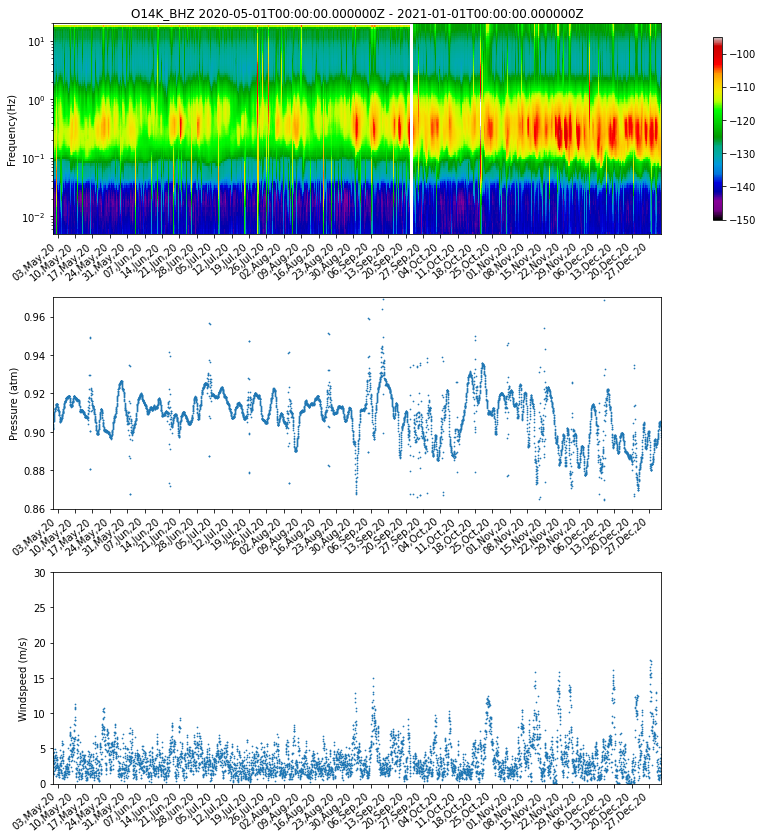

In [21]:
xmin=18383
xmax=18628


cmap = plt.get_cmap('nipy_spectral').copy()
cmap.set_over(color = 'w')
fig = plt.figure()
fig.set_figheight(14)
fig.set_figwidth(12)
spec = gridspec.GridSpec(ncols=2, nrows=3,width_ratios=[10, 1], wspace=0,hspace=0.3, height_ratios=[1,1,1])
ax1 = fig.add_subplot(spec[0])
c = ax1.pcolormesh(fint_frames,freq,final,cmap=cmap,vmin=-195,vmax=-95,shading='auto',rasterized=True)

nom=cl.Normalize(vmin=-150,vmax=-95)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU)))
#ax1.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=(WE)))
ax1.xaxis.set_major_formatter(date_format)
#ax1.xaxis.set_minor_formatter(date_format1)

ax1.set_ylabel("Frequency(Hz)")

ax1.set_yscale('log')
ax1.title.set_text(sta+"_"+cha+" "+str(UTCDateTime((mdates.num2date(xmin)).strftime('%Y-%m-%d')))+" - "+str(UTCDateTime((mdates.num2date(xmax)).strftime('%Y-%m-%d'))))
ax0 = fig.add_subplot(spec[1])
ax0.axis('off')
fig.colorbar(cm.ScalarMappable(norm=nom, cmap="nipy_spectral"), ax=ax0)
ax2 = fig.add_subplot(spec[2])
ax2.scatter(finalp[:,0],finalp[:,1], s=0.5)
ax2.set_ylim([0.86,0.97])
ax2.set_xlim([mintp,maxtp])
ax2.set_ylabel("Pressure (atm)")
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU)))
#ax2.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[2]))
ax2.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_minor_formatter(date_format1)

ax3=fig.add_subplot(spec[4])
ax3.scatter(finalw[:,0],finalw[:,1], s=0.5)
ax3.set_xlim([mintp,maxtp])
ax3.xaxis.set_major_formatter(date_format)
ax3.xaxis.set_minor_formatter(date_format1)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU)))
ax3.set_ylabel("Windspeed (m/s)")

fig.set_facecolor('white')


ax1.set_xlim([xmin,xmax])
ax2.set_xlim([xmin,xmax])
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([0,30])

for label in ax1.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
for label in ax2.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
for label in ax3.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

fig.savefig("spectromon"+sta+".png")
fig.savefig("spectromon1"+sta+".eps")

In [20]:
mdates.date2num(datetime(2021,1,1))

18628.0